In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('Automobile_data.xlsx', index_col=0)
df

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,Fuel_System,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
Sl. No.,,,,,,,,,,,,,,,,,,,,,
1,Tata,Nano Genx,Xt,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Xe,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xta,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Tata,Nano Genx,Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,Skoda,Octavia,Onyx 1.8 Tsi Dsg,1798.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",Injection,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
784,Skoda,Octavia,Onyx 2.0 Tdi Dsg,1968.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",Injection,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
785,Mahindra,Verito,1.5 D2,1461.0,4.0,3.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Make', 'Model', 'Variant', 'Displacement', 'Cylinders',
       'Valves_Per_Cylinder', 'Drivetrain', 'Cylinder_Configuration',
       'Engine_Location', 'Fuel_System',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=138)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787 entries, 1 to 787
Columns: 138 entries, Make to Electric_Range
dtypes: float64(12), int64(3), object(123)
memory usage: 854.6+ KB


There are 12 columns' dtype are float64, and 3 columns' dtype are int64, therefore, there are 15 columns are numerical type data.

In [5]:
df.describe()

,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Height_mm,Length_mm,Width_mm,Doors,City_Mileage_km_litre,Highway_Mileage_km_litre,Seating_Capacity,Boot_Space_litre,Minimum_Turning_Radius,Number_of_Airbags,USB_Ports
count,778.000000,747.000000,726.000000,768.000000,787.000000,787.000000,787.000000,785.000000,458.000000,299.000000,784.000000,656.000000,588.000000,704.000000,8.000000
mean,1515.865039,3.824632,3.889807,46.843620,1598.471410,4150.581957,1748.161372,4.681529,17.403384,18.654783,5.394133,358.439024,5.324235,3.014205,1.875000
std,562.367933,0.721209,0.453621,11.897565,131.977753,400.650726,110.858485,0.520476,6.360217,3.851954,1.016601,137.145321,1.037693,2.092409,0.991031
min,72.000000,2.000000,2.000000,15.000000,1304.000000,3164.000000,1410.000000,2.000000,4.450000,7.940000,2.000000,94.000000,4.000000,1.000000,1.000000
25%,1197.000000,3.000000,4.000000,37.000000,1510.000000,3895.000000,1695.000000,4.000000,13.300000,15.500000,5.000000,256.000000,4.900000,2.000000,1.000000
50%,1396.500000,4.000000,4.000000,45.000000,1560.000000,3995.000000,1735.000000,5.000000,16.300000,18.190000,5.000000,347.500000,5.200000,2.000000,1.500000
75%,1591.000000,4.000000,4.000000,55.000000,1655.000000,4445.000000,1814.000000,5.000000,20.890000,22.000000,5.000000,460.000000,5.400000,2.250000,3.000000
max,6592.000000,12.000000,4.000000,93.000000,2670.000000,5458.000000,2218.000000,5.000000,80.000000,25.320000,16.000000,981.000000,11.700000,10.000000,3.000000


In [6]:
# get the column names of numberical data
numerical_data_columns_name = []
categorial_data_columns_name = []
for col in df.columns:
    if df[col].dtypes == 'float64' or df[col].dtypes == 'int64':
        numerical_data_columns_name.append(col)
    else:
        categorial_data_columns_name.append(col)

numerical_data_columns_name

['Displacement',
 'Cylinders',
 'Valves_Per_Cylinder',
 'Fuel_Tank_Capacity_litre',
 'Height_mm',
 'Length_mm',
 'Width_mm',
 'Doors',
 'City_Mileage_km_litre',
 'Highway_Mileage_km_litre',
 'Seating_Capacity',
 'Boot_Space_litre',
 'Minimum_Turning_Radius',
 'Number_of_Airbags',
 'USB_Ports']

In [7]:
num_df = df[numerical_data_columns_name]
for item in num_df.columns:
    
    index = num_df[item].isna().value_counts().index
    value = num_df[item].isna().value_counts().values
    if len(index) == 1:
        print(item, end='-------')
        if index[0] == False:
            print('0 missing data')
            
    else:
        print(item, end='-------')
        if index[0] == True:
            print(f'{value[0]} missing data')
        else:
            print(f'{value[1]} missing data')
        
# num_df['Displacement'].isna().value_counts().index

Displacement-------9 missing data
Cylinders-------40 missing data
Valves_Per_Cylinder-------61 missing data
Fuel_Tank_Capacity_litre-------19 missing data
Height_mm-------0 missing data
Length_mm-------0 missing data
Width_mm-------0 missing data
Doors-------2 missing data
City_Mileage_km_litre-------329 missing data
Highway_Mileage_km_litre-------488 missing data
Seating_Capacity-------3 missing data
Boot_Space_litre-------131 missing data
Minimum_Turning_Radius-------199 missing data
Number_of_Airbags-------83 missing data
USB_Ports-------779 missing data


In [8]:
for col in num_df.columns:
    print(col, end='-------')
    median = num_df[col].median()
    mode = num_df[col].mode()
    
    print(f"Median is {median}, and mode is {mode}")


Displacement-------Median is 1396.5, and mode is 0    1197.0
Name: Displacement, dtype: float64
Cylinders-------Median is 4.0, and mode is 0    4.0
Name: Cylinders, dtype: float64
Valves_Per_Cylinder-------Median is 4.0, and mode is 0    4.0
Name: Valves_Per_Cylinder, dtype: float64
Fuel_Tank_Capacity_litre-------Median is 45.0, and mode is 0    45.0
Name: Fuel_Tank_Capacity_litre, dtype: float64
Height_mm-------Median is 1560.0, and mode is 0    1520
Name: Height_mm, dtype: int64
Length_mm-------Median is 3995.0, and mode is 0    3995
Name: Length_mm, dtype: int64
Width_mm-------Median is 1735.0, and mode is 0    1735
Name: Width_mm, dtype: int64
Doors-------Median is 5.0, and mode is 0    5.0
Name: Doors, dtype: float64
City_Mileage_km_litre-------Median is 16.3, and mode is 0    16.0
Name: City_Mileage_km_litre, dtype: float64
Highway_Mileage_km_litre-------Median is 18.19, and mode is 0    22.0
Name: Highway_Mileage_km_litre, dtype: float64
Seating_Capacity-------Median is 5.0, and

In [9]:
df['Body_Type'].value_counts()

Hatchback              263
Sedan                  223
SUV                    223
MUV                     32
MPV                     25
Crossover               10
Coupe                    3
Crossover, SUV           2
SUV, Crossover           2
Sports, Convertible      2
Sedan, Coupe             1
Name: Body_Type, dtype: int64

# Relationship between body type and Cylinders

In [10]:
cur_df = df[['Body_Type', 'Cylinders']]
cur_df

,Body_Type,Cylinders
Sl. No.,,
1,Hatchback,2.0
2,Hatchback,2.0
3,Hatchback,2.0
4,Hatchback,2.0
5,Hatchback,2.0
...,...,...
783,Sedan,4.0
784,Sedan,4.0
785,Sedan,4.0


In [11]:
# check non value in cyliners and body type
cur_df['Body_Type'].isna().value_counts()

False    786
True       1
Name: Body_Type, dtype: int64

In [12]:
cur_df['Cylinders'].isna().value_counts()

False    747
True      40
Name: Cylinders, dtype: int64

In [13]:
# We found that there are 41 rows are no values therefore, we just drop these value
cur_df = cur_df.dropna()

In [14]:
cur_df

,Body_Type,Cylinders
Sl. No.,,
1,Hatchback,2.0
2,Hatchback,2.0
3,Hatchback,2.0
4,Hatchback,2.0
5,Hatchback,2.0
...,...,...
783,Sedan,4.0
784,Sedan,4.0
785,Sedan,4.0


In [15]:
cur_df['Body_Type'].value_counts()

Hatchback              261
SUV                    208
Sedan                  200
MUV                     32
MPV                     25
Crossover               10
Coupe                    3
Crossover, SUV           2
SUV, Crossover           2
Sports, Convertible      2
Sedan, Coupe             1
Name: Body_Type, dtype: int64

In [16]:
# create a dict to store each type of body type, 
body_cyl_dic = defaultdict(list)
for row in cur_df.iterrows():
    b_type = row[1][0].split(', ')
    for item in b_type:
        body_cyl_dic[item].append(row[1][1])
final_b_c_dic = defaultdict(dict)
for key, value in body_cyl_dic.items():
    counter_item = Counter(value)
    cur_value_sum = sum(list(counter_item.values()))
    for key_in in counter_item.keys():
        final_b_c_dic[key][key_in] = round((counter_item[key_in] / cur_value_sum) * 100, 1)
final_b_c_dic

defaultdict(dict,
            {'Hatchback': {2.0: 2.3, 3.0: 47.5, 4.0: 50.2},
             'MPV': {4.0: 92.0, 3.0: 8.0},
             'MUV': {3.0: 12.5, 4.0: 87.5},
             'Sedan': {4.0: 88.1, 3.0: 6.0, 8.0: 1.0, 6.0: 4.5, 12.0: 0.5},
             'Crossover': {4.0: 64.3, 3.0: 35.7},
             'SUV': {4.0: 79.2, 6.0: 3.3, 3.0: 16.5, 5.0: 0.5, 8.0: 0.5},
             'Coupe': {8.0: 50.0, 6.0: 50.0},
             'Sports': {4.0: 50.0, 6.0: 50.0},
             'Convertible': {4.0: 50.0, 6.0: 50.0}})

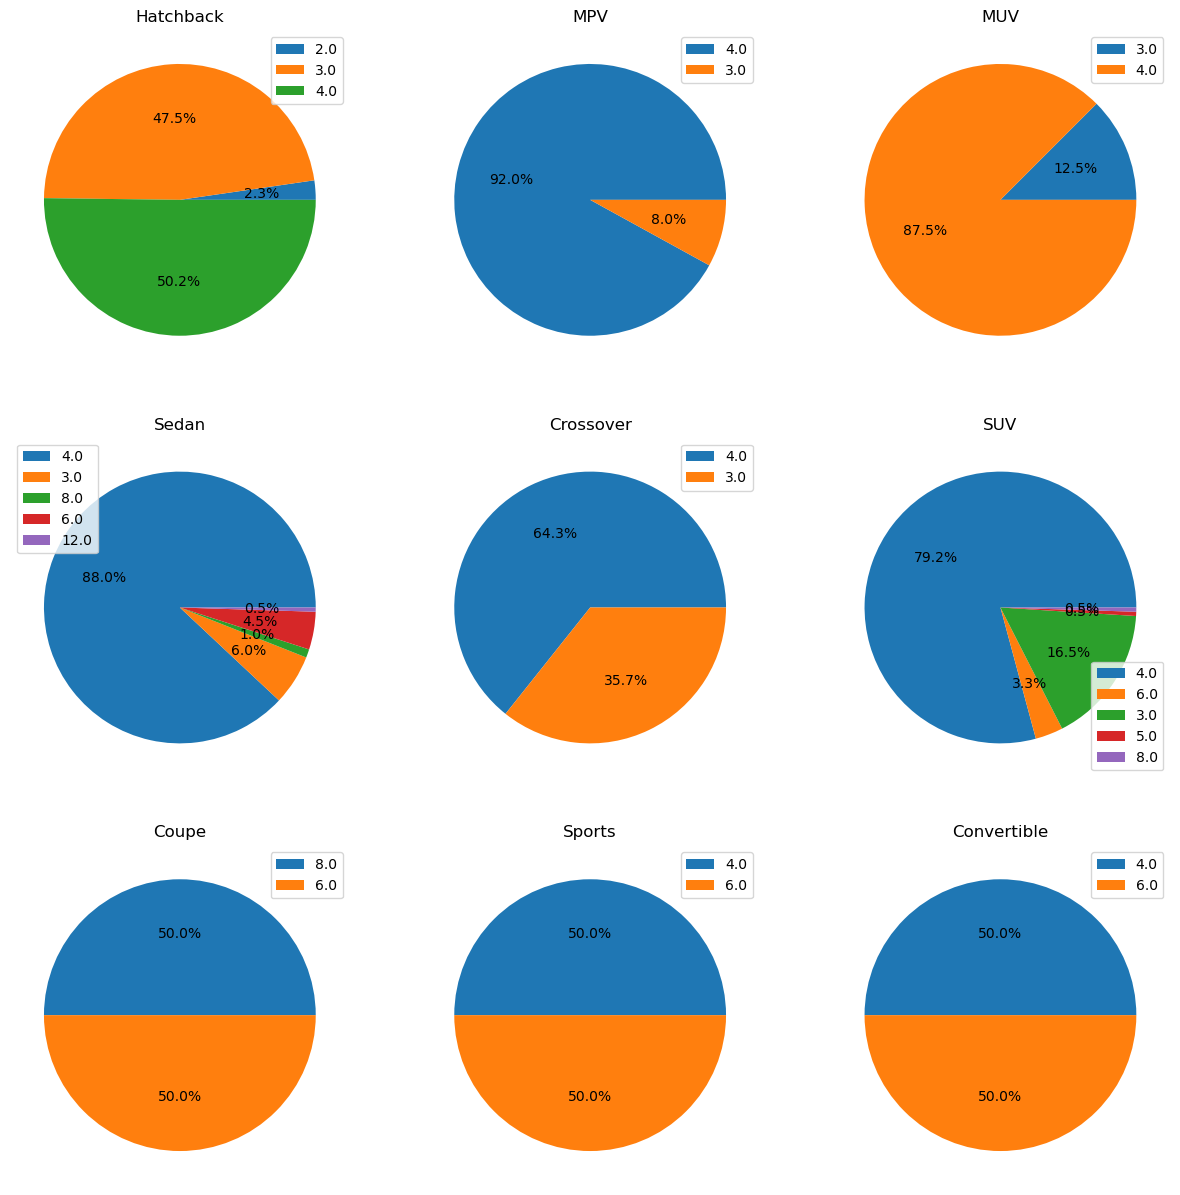

In [17]:
fig, axes = plt.subplots(figsize=(15,15), ncols=3, nrows=3)

row = 0
col = 0

for key, value in final_b_c_dic.items():
    axes[row][col].set_title(f'{key}')
    y = np.array(list(final_b_c_dic[key].values()))
    my_labels = list(final_b_c_dic[key].keys())
    axes[row][col].pie(y, autopct='%1.1f%%')
    axes[row][col].legend(my_labels)
    col += 1
    
    if col == 3:
        col = 0
        row += 1
    

# The relationship between the type of brake and model and cylinder

In [18]:
q2_df = df[['Make', 'Cylinders', 'Front_Brakes', 'Rear_Brakes']]
q2_df

,Make,Cylinders,Front_Brakes,Rear_Brakes
Sl. No.,,,,
1,Tata,2.0,Drum,Drum
2,Tata,2.0,Drum,Drum
3,Tata,2.0,Drum,Drum
4,Tata,2.0,Drum,Drum
5,Tata,2.0,Drum,Drum
...,...,...,...,...
783,Skoda,4.0,Ventilated Disc,Ventilated Disc
784,Skoda,4.0,Ventilated Disc,Ventilated Disc
785,Mahindra,4.0,Ventilated Disc,Drum


In [19]:
q2_df['Front_Brakes'].isna().value_counts()

False    782
True       5
Name: Front_Brakes, dtype: int64

In [20]:
q2_df['Rear_Brakes'].isna().value_counts()

False    782
True       5
Name: Rear_Brakes, dtype: int64

In [21]:
# We can know that there are several rows are no data
# Therefore, just dropping these rows
q2_df = q2_df.dropna()
q2_df

,Make,Cylinders,Front_Brakes,Rear_Brakes
Sl. No.,,,,
1,Tata,2.0,Drum,Drum
2,Tata,2.0,Drum,Drum
3,Tata,2.0,Drum,Drum
4,Tata,2.0,Drum,Drum
5,Tata,2.0,Drum,Drum
...,...,...,...,...
783,Skoda,4.0,Ventilated Disc,Ventilated Disc
784,Skoda,4.0,Ventilated Disc,Ventilated Disc
785,Mahindra,4.0,Ventilated Disc,Drum


In [22]:
# First, we check the make and brakes relationships
make_cylinder_dict = defaultdict(list)
for row in q2_df.iterrows():
    make_cylinder_dict[row[1]['Make']].append(row[1]['Cylinders'])

make_cylinder_dict_count = defaultdict(dict)
for key, value in make_cylinder_dict.items():
    counter = Counter(value)
    all_item = sum(list(counter.values()))
    for key_in in counter.keys():
        make_cylinder_dict_count[key][key_in] = round((counter[key_in] / all_item) * 100, 1)
    
make_cylinder_dict_count

defaultdict(dict,
            {'Tata': {2.0: 6.5, 3.0: 43.0, 4.0: 50.5},
             'Renault': {3.0: 44.4, 4.0: 55.6},
             'Suzuki': {4.0: 60.7, 3.0: 39.3},
             'Hyundai': {4.0: 92.9, 3.0: 7.1},
             'Toyota': {4.0: 98.8, 8.0: 1.2},
             'Volkswagen': {3.0: 20.7, 4.0: 79.3},
             'Ford': {4.0: 72.1, 3.0: 23.3, 8.0: 2.3, 5.0: 2.3},
             'Mahindra': {4.0: 63.5, 3.0: 36.5},
             'Skoda': {4.0: 100.0},
             'Bmw': {4.0: 40.5, 6.0: 51.4, 12.0: 2.7, 8.0: 5.4}})

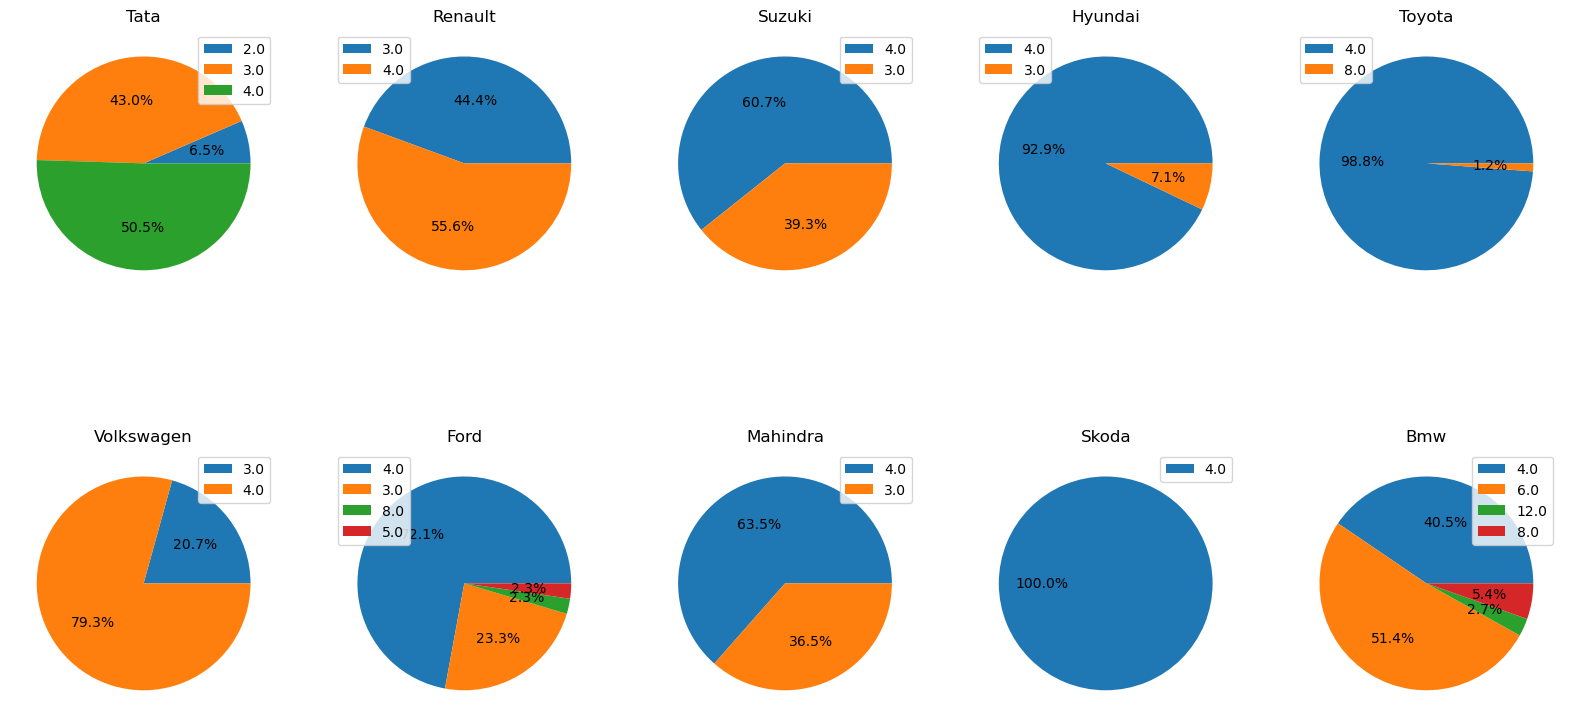

In [23]:
fig, axes = plt.subplots(figsize=(20,10), ncols=5, nrows=2)

row = 0
col = 0

for key, value in make_cylinder_dict_count.items():
    axes[row][col].set_title(f'{key}')
    y = np.array(list(make_cylinder_dict_count[key].values()))
    my_labels = list(make_cylinder_dict_count[key].keys())
    axes[row][col].pie(y, autopct='%1.1f%%')
    axes[row][col].legend(my_labels)
    col += 1
    
    if col == 5:
        col = 0
        row += 1

In [24]:
make_front_brakes = defaultdict(list)
for row in q2_df.iterrows():
    make_front_brakes[row[1]['Make']].append(row[1]['Front_Brakes'])

make_front_brakes_count = defaultdict(dict)
for key, value in make_front_brakes.items():
    counter = Counter(value)
    all_item = sum(list(counter.values()))
    for key_in in counter.keys():
        make_front_brakes_count[key][key_in] = round((counter[key_in] / all_item) * 100, 1)
    
make_front_brakes_count

defaultdict(dict,
            {'Tata': {'Drum': 6.5,
              'Ventilated Disc': 80.6,
              'Solid Disc': 12.9},
             'Renault': {'Ventilated Disc': 88.9, 'Solid Disc': 11.1},
             'Suzuki': {'Ventilated Disc': 91.4, 'Solid Disc': 8.6},
             'Hyundai': {'Solid Disc': 14.3, 'Ventilated Disc': 85.7},
             'Toyota': {'Ventilated Disc': 100.0},
             'Volkswagen': {'Ventilated Disc': 100.0},
             'Ford': {'Ventilated Disc': 100.0},
             'Mahindra': {'Solid Disc': 7.7, 'Ventilated Disc': 92.3},
             'Skoda': {'Ventilated Disc': 100.0},
             'Bmw': {'Ventilated Disc': 97.3, 'Solid Disc': 2.7}})

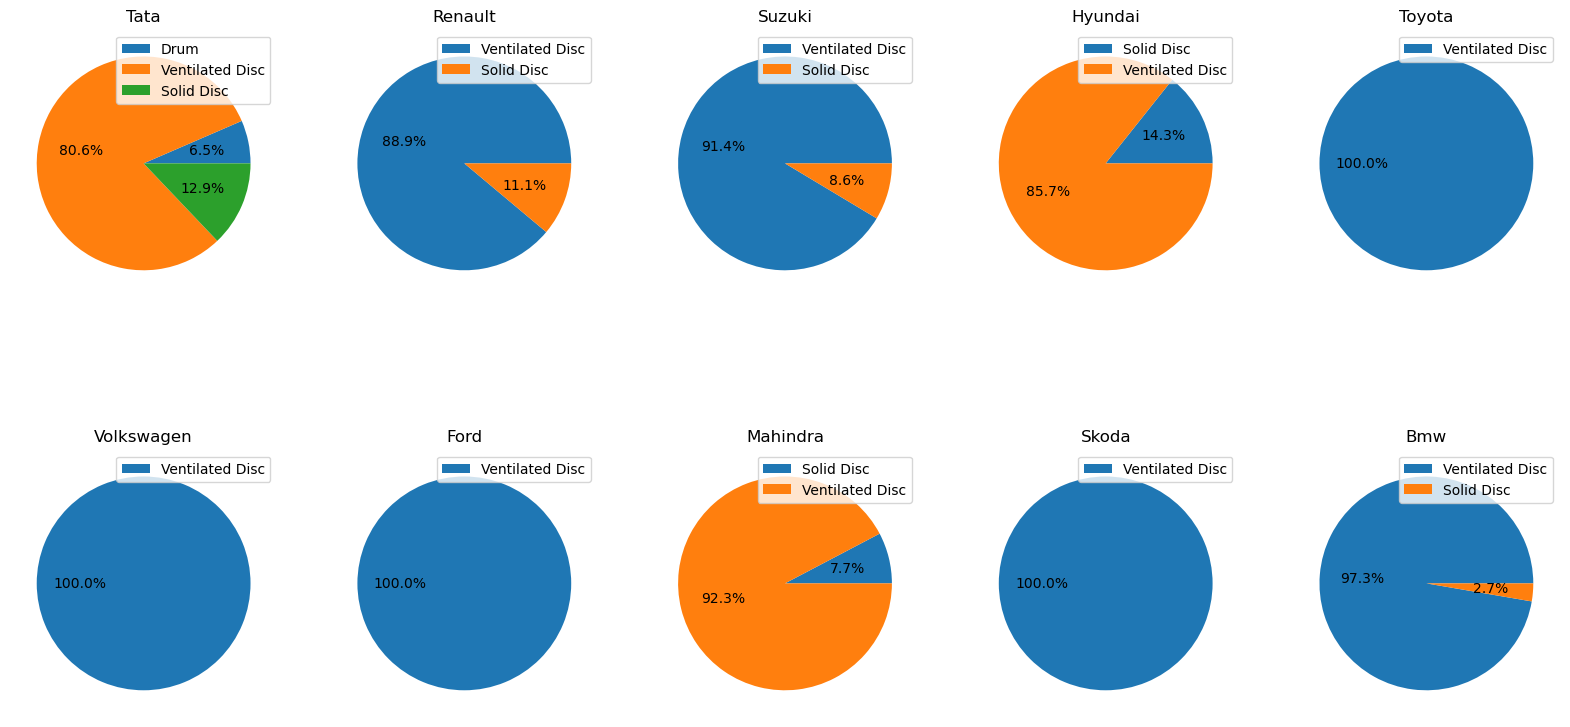

In [25]:
fig, axes = plt.subplots(figsize=(20,10), ncols=5, nrows=2)

row = 0
col = 0

for key, value in make_front_brakes_count.items():
    axes[row][col].set_title(f'{key}')
    y = np.array(list(make_front_brakes_count[key].values()))
    my_labels = list(make_front_brakes_count[key].keys())
    axes[row][col].pie(y, autopct='%1.1f%%')
    axes[row][col].legend(my_labels, loc=1)
    col += 1
    
    if col == 5:
        col = 0
        row += 1

In [26]:
make_rear_brakes = defaultdict(list)
for row in q2_df.iterrows():
    make_rear_brakes[row[1]['Make']].append(row[1]['Rear_Brakes'])

make_rear_brakes_count = defaultdict(dict)
for key, value in make_rear_brakes.items():
    counter = Counter(value)
    all_item = sum(list(counter.values()))
    for key_in in counter.keys():
        make_rear_brakes_count[key][key_in] = round((counter[key_in] / all_item) * 100, 1)
    
make_rear_brakes_count

defaultdict(dict,
            {'Tata': {'Drum': 90.3, 'Ventilated Disc': 9.7},
             'Renault': {'Drum': 100.0},
             'Suzuki': {'Drum': 98.2,
              'Ventilated Disc': 0.6,
              'Solid Disc': 1.2},
             'Hyundai': {'Drum': 89.3,
              'Ventilated Disc': 4.5,
              'Solid Disc': 6.2},
             'Toyota': {'Drum': 72.0,
              'Ventilated Disc': 19.5,
              'Solid Disc': 8.5},
             'Volkswagen': {'Drum': 79.3,
              'Solid Disc': 6.9,
              'Ventilated Disc': 13.8},
             'Ford': {'Drum': 90.7, 'Ventilated Disc': 9.3},
             'Mahindra': {'Drum': 69.2,
              'Ventilated Disc': 28.8,
              'Solid Disc': 1.9},
             'Skoda': {'Ventilated Disc': 58.1, 'Drum': 41.9},
             'Bmw': {'Ventilated Disc': 100.0}})

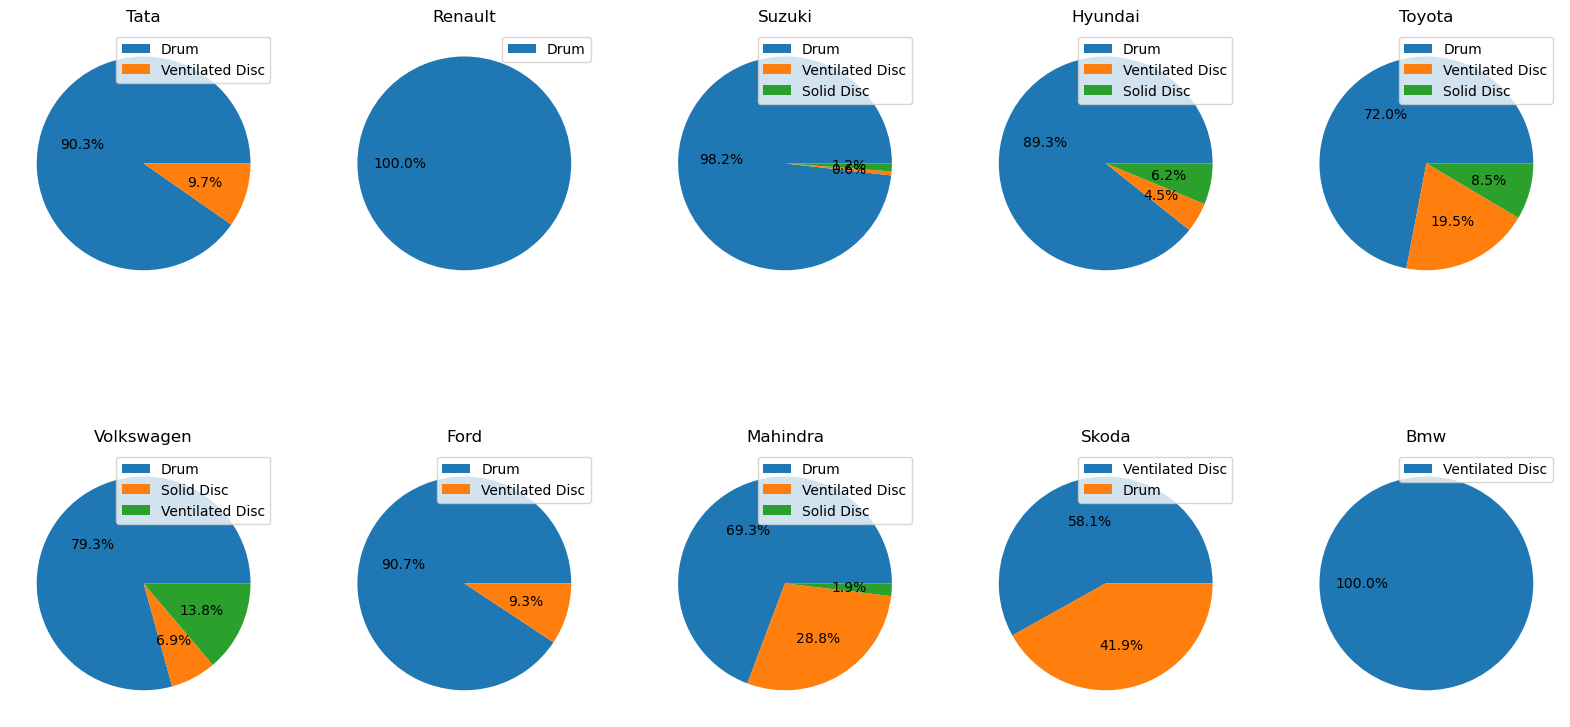

In [27]:
fig, axes = plt.subplots(figsize=(20,10), ncols=5, nrows=2)

row = 0
col = 0

for key, value in make_rear_brakes_count.items():
    axes[row][col].set_title(f'{key}')
    y = np.array(list(make_rear_brakes_count[key].values()))
    my_labels = list(make_rear_brakes_count[key].keys())
    axes[row][col].pie(y, autopct='%1.1f%%')
    axes[row][col].legend(my_labels, loc=1)
    col += 1
    
    if col == 5:
        col = 0
        row += 1

In [28]:
# Combination of front_brake and rear brake
make_front_rear_brakes = defaultdict(list)
for row in q2_df.iterrows():
    rear = row[1]['Rear_Brakes']
    front = row[1]['Front_Brakes']

    front_end = front + ' + ' + rear
    make_front_rear_brakes[row[1]['Make']].append(front_end)

make_front_rear_brakes_count = defaultdict(dict)
for key, value in make_front_rear_brakes.items():
    counter = Counter(value)
    all_item = sum(list(counter.values()))
    for key_in in counter.keys():
        make_front_rear_brakes_count[key][key_in] = round((counter[key_in] / all_item) * 100, 1)
    
make_front_rear_brakes_count

defaultdict(dict,
            {'Tata': {'Drum + Drum': 6.5,
              'Ventilated Disc + Drum': 71.0,
              'Solid Disc + Drum': 12.9,
              'Ventilated Disc + Ventilated Disc': 9.7},
             'Renault': {'Ventilated Disc + Drum': 88.9,
              'Solid Disc + Drum': 11.1},
             'Suzuki': {'Ventilated Disc + Drum': 89.6,
              'Solid Disc + Drum': 8.6,
              'Ventilated Disc + Ventilated Disc': 0.6,
              'Ventilated Disc + Solid Disc': 1.2},
             'Hyundai': {'Solid Disc + Drum': 14.3,
              'Ventilated Disc + Drum': 75.0,
              'Ventilated Disc + Ventilated Disc': 4.5,
              'Ventilated Disc + Solid Disc': 6.2},
             'Toyota': {'Ventilated Disc + Drum': 72.0,
              'Ventilated Disc + Ventilated Disc': 19.5,
              'Ventilated Disc + Solid Disc': 8.5},
             'Volkswagen': {'Ventilated Disc + Drum': 79.3,
              'Ventilated Disc + Solid Disc': 6.9,
           

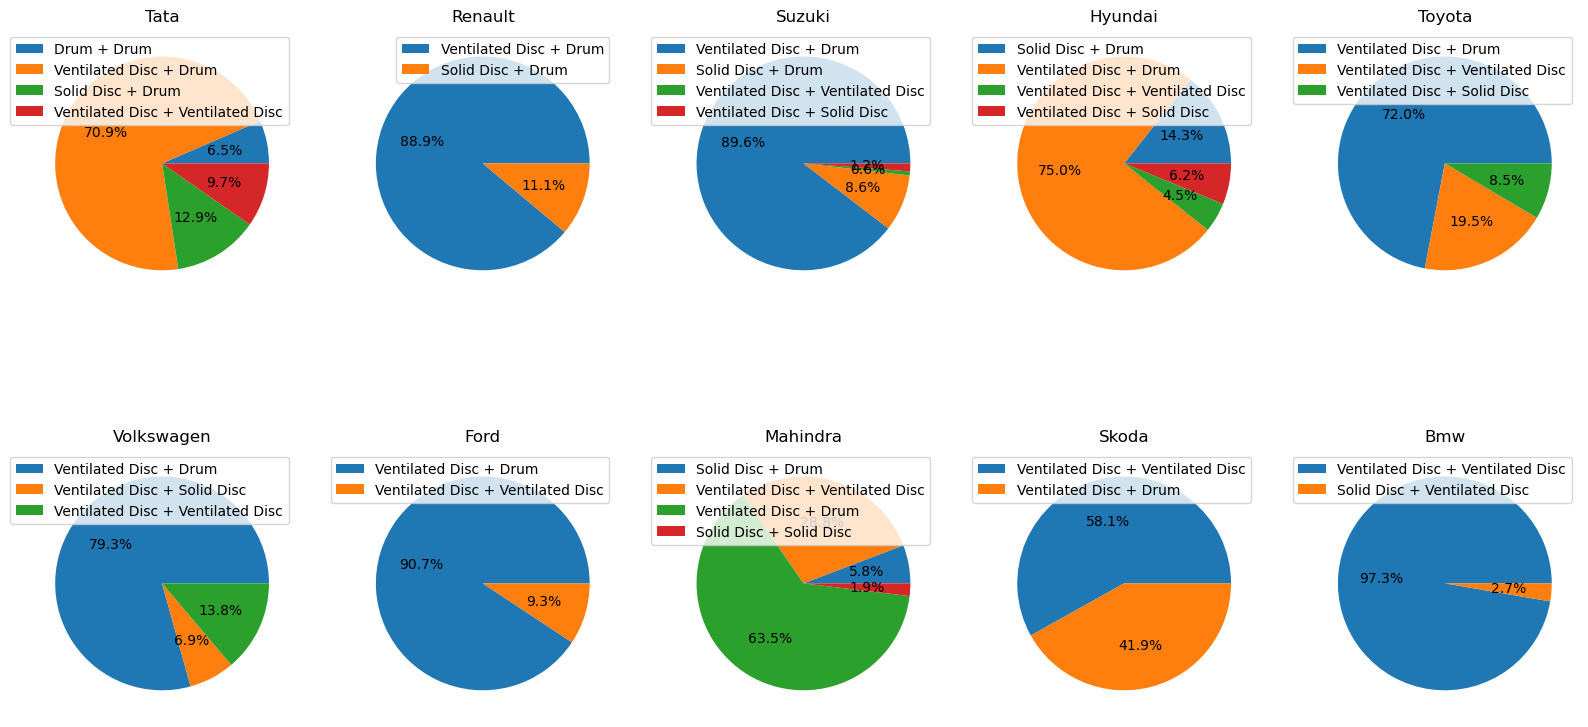

In [29]:
fig, axes = plt.subplots(figsize=(20,10), ncols=5, nrows=2)

row = 0
col = 0

for key, value in make_front_rear_brakes_count.items():
    axes[row][col].set_title(f'{key}')
    y = np.array(list(make_front_rear_brakes_count[key].values()))
    my_labels = list(make_front_rear_brakes_count[key].keys())
    axes[row][col].pie(y, autopct='%1.1f%%')
    axes[row][col].legend(my_labels, loc=1)
    col += 1
    
    if col == 5:
        col = 0
        row += 1

In [30]:
# Combination of front_brake and rear brake
cylinder_front_rear_brakes = defaultdict(list)
for row in q2_df.iterrows():
    rear = row[1]['Rear_Brakes']
    front = row[1]['Front_Brakes']

    front_end = front + ' + ' + rear
    cylinder_front_rear_brakes[row[1]['Cylinders']].append(front_end)

cylinder_front_rear_brakes_count = defaultdict(dict)
for key, value in cylinder_front_rear_brakes.items():
    counter = Counter(value)
    all_item = sum(list(counter.values()))
    for key_in in counter.keys():
        cylinder_front_rear_brakes_count[key][key_in] = round((counter[key_in] / all_item) * 100, 1)
    
cylinder_front_rear_brakes_count

defaultdict(dict,
            {2.0: {'Drum + Drum': 100.0},
             3.0: {'Ventilated Disc + Drum': 90.1,
              'Solid Disc + Drum': 9.3,
              'Ventilated Disc + Ventilated Disc': 0.5},
             4.0: {'Ventilated Disc + Drum': 69.8,
              'Solid Disc + Drum': 6.6,
              'Ventilated Disc + Ventilated Disc': 19.8,
              'Ventilated Disc + Solid Disc': 3.4,
              'Solid Disc + Solid Disc': 0.4},
             6.0: {'Ventilated Disc + Ventilated Disc': 94.7,
              'Solid Disc + Ventilated Disc': 5.3},
             8.0: {'Ventilated Disc + Ventilated Disc': 100.0},
             12.0: {'Ventilated Disc + Ventilated Disc': 100.0},
             5.0: {'Ventilated Disc + Ventilated Disc': 100.0}})

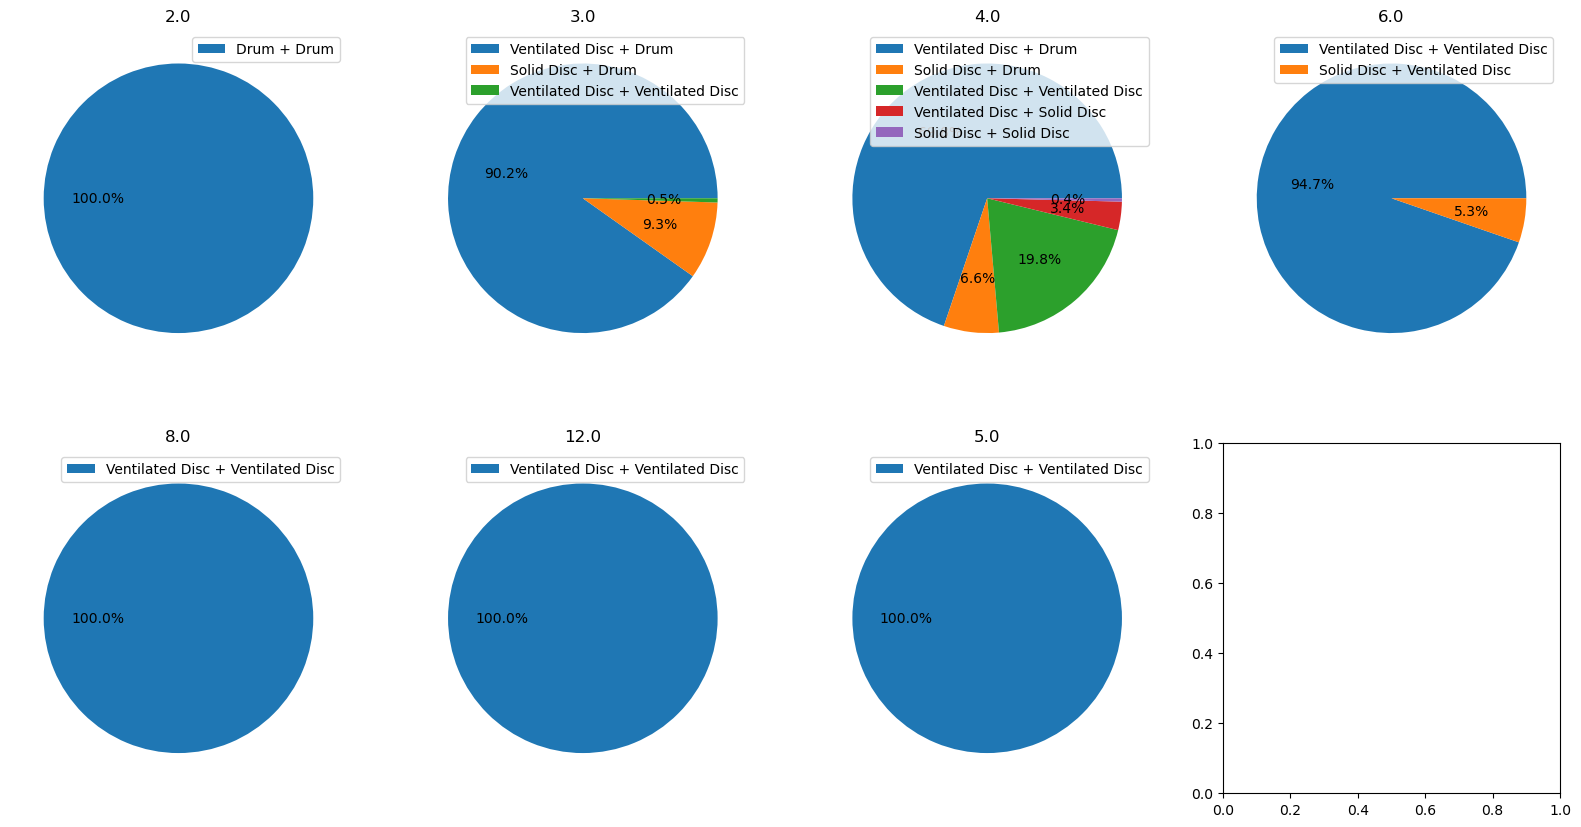

In [31]:
fig, axes = plt.subplots(figsize=(20,10), ncols=4, nrows=2)

row = 0
col = 0

for key, value in cylinder_front_rear_brakes_count.items():
    axes[row][col].set_title(f'{key}')
    y = np.array(list(cylinder_front_rear_brakes_count[key].values()))
    my_labels = list(cylinder_front_rear_brakes_count[key].keys())
    axes[row][col].pie(y, autopct='%1.1f%%')
    axes[row][col].legend(my_labels, loc=1)
    col += 1
    
    if col == 4:
        col = 0
        row += 1

From the above analysis, we can know that for there is no relationship between the type of brake and the number of cylinders.

Besides, For the Front Brake, the Ventilated Disc brakes are used the most. 

For the Rear Brake, the Drum brakes are used the most, except for the BMW.

For the combination of Front Brake and the Rear Brake, the most common combination is Ventilate Disc Brake as the front brake and the Drum brakes for the Rear Brake.

The combination of using ventilate disc brake as both front brake and rear brake also exists a lot.


# The relationship between the number of cylinders and City Mileage km litre

In [32]:
q3_df = df[['Cylinders', 'City_Mileage_km_litre']]
q3_df

,Cylinders,City_Mileage_km_litre
Sl. No.,,
1,2.0,23.6
2,2.0,23.6
3,2.0,NaN
4,2.0,23.6
5,2.0,23.6
...,...,...
783,4.0,NaN
784,4.0,NaN
785,4.0,18.0


In [35]:
q3_df.isna().value_counts()

Cylinders  City_Mileage_km_litre
False      False                    447
           True                     300
True       True                      29
           False                     11
dtype: int64

In [36]:
q3_df = q3_df.dropna()

In [37]:
q3_df

,Cylinders,City_Mileage_km_litre
Sl. No.,,
1,2.0,23.6
2,2.0,23.6
4,2.0,23.6
5,2.0,23.6
6,2.0,23.6
...,...,...
754,3.0,12.8
755,3.0,12.8
785,4.0,18.0


In [54]:
grouop_by_df = q3_df.groupby('Cylinders').mean()
grouop_by_df

,City_Mileage_km_litre
Cylinders,
2.0,23.600000
3.0,20.373168
4.0,16.350545
5.0,7.700000
6.0,12.632857
8.0,6.583333


[Text(0, 0, '23.6'),
 Text(0, 0, '20.3732'),
 Text(0, 0, '16.3505'),
 Text(0, 0, '7.7'),
 Text(0, 0, '12.6329'),
 Text(0, 0, '6.58333')]

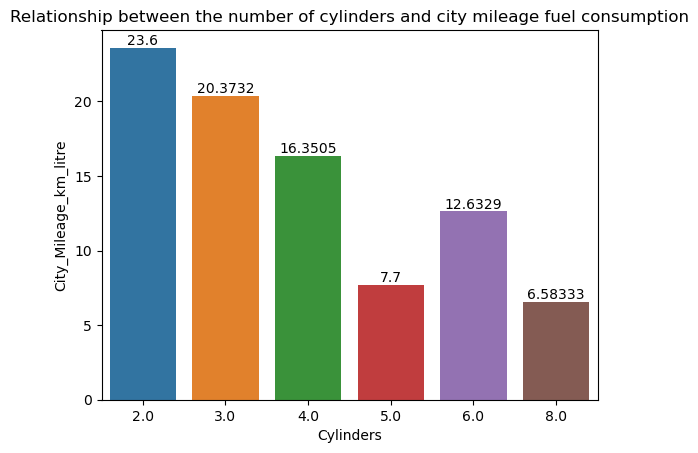

In [56]:
ax = sns.barplot(data=grouop_by_df, x=grouop_by_df.index, y=grouop_by_df['City_Mileage_km_litre'])
ax.set(title='Relationship between the number of cylinders and city mileage fuel consumption')
ax.bar_label(ax.containers[0])